<a href="https://www.kaggle.com/code/nancymee/customer-segmentation-using-k-means?scriptVersionId=189267394" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('/kaggle/input/customer-segmentation-data/Day13_Customer_Segmentation_Data.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.shape

(200, 5)

## Defining Numerical and Categorical Features

In [31]:
num_feat = [feature for feature in data.columns if data[feature].dtype != 'O']
cat_feat = [feature for feature in data.columns if data[feature].dtype == 'O']


In [32]:
num_feat

['CustomerID',
 'Age',
 'Annual Income (k$)',
 'Spending Score (1-100)',
 'cluster']

In [33]:
cat_feat

['Gender']

### Missing Data

In [34]:
total= data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
CustomerID,0,0.0
Gender,0,0.0
Age,0,0.0
Annual Income (k$),0,0.0
Spending Score (1-100),0,0.0
cluster,0,0.0


In [35]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,1.745000
std,57.879185,13.969007,26.264721,25.823522,1.392722
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,1.000000
50%,100.500000,36.000000,61.500000,50.000000,1.000000
75%,150.250000,49.000000,78.000000,73.000000,3.000000
max,200.000000,70.000000,137.000000,99.000000,4.000000


In [36]:
data.describe(include='object').T

,count,unique,top,freq
Gender,200,2,Female,112


## Data Cleaning and Preprocessing

For clustering processes, we will choose the annual income and spending score columns

In [39]:
X = data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Data Standardization

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data
X

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Choosing number of clusters (.score() method)
The .score() method computes the opposite of the value of the objective function. It returns the negative of the inertia (the sum of squared distances of samples to their closest cluster center)

In [43]:
from sklearn.cluster import KMeans

iteration = range(1,10) #define the range for our number of clusters from 1-9
scores = [] #This empty list will be used to store the scores of each cluster number

#Loop through cluster numbers:
for cluster_number in iteration:
    K_Means = KMeans(n_clusters=cluster_number, random_state=45)
    K_Means.fit(X)
    scores.append(K_Means.score(X))
    
scores

[-400.0,
 -270.02616084451506,
 -157.70400815035947,
 -108.9213166136436,
 -65.5684081557168,
 -55.05734827038599,
 -45.33255486071674,
 -37.24595372674167,
 -33.854106217363686]

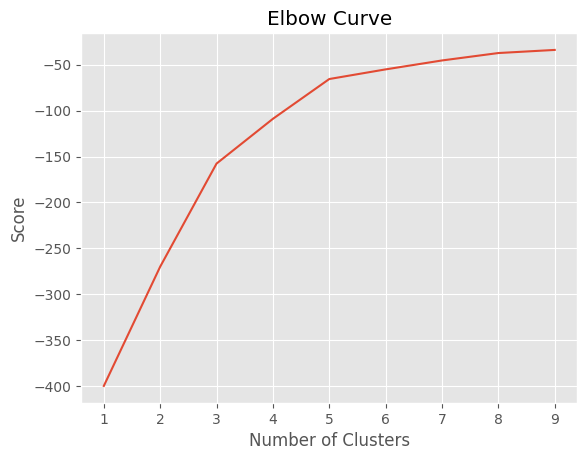

In [44]:
plt.plot(iteration,scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve') #Elbow curve = Number of clusters vs Score
plt.xticks(iteration)
plt.style.use('ggplot')
plt.show()

**The optimal number of clusters is 5**
* We choose the optimal number of clusters by finding the "elbow" point on the graph, which is where the rate of decrease sharply slows down
* This point indicates the number of clusters where adding more clusters doesn't significantly reduce the inertia (or score)

## Model Building

In [45]:
final_model = KMeans(n_clusters= 5, random_state=45)
final_model.fit(X)

KMeans(n_clusters=5, random_state=45)

In [47]:
cluster_labels = final_model.labels_
cluster_labels

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

In [48]:
data['cluster'] = cluster_labels
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,0
197,198,Male,32,126,74,4
198,199,Male,32,137,18,0


In [49]:
data.groupby('cluster').agg({'Annual Income (k$)': 'mean',
                            'Spending Score (1-100)': ['mean', 'count'],}).round(0)

Annual Income (k$) Spending Score (1-100)      
                      mean                   mean count
cluster                                                
0                     88.0                   17.0    35
1                     55.0                   50.0    81
2                     26.0                   21.0    23
3                     26.0                   79.0    22
4                     87.0                   82.0    39

In [50]:
Y = cluster_labels
Y

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1,
       2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 4, 1, 4, 0, 4, 0, 4,
       1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

Let's create a scatter plot to visualize clusters of data points where each cluster is represented by a different color. We will also plot the centroids of these clusters
* This will help us understand the distribution and characteristics of each cluster in terms of "Annual Income" and "Spending Score". 

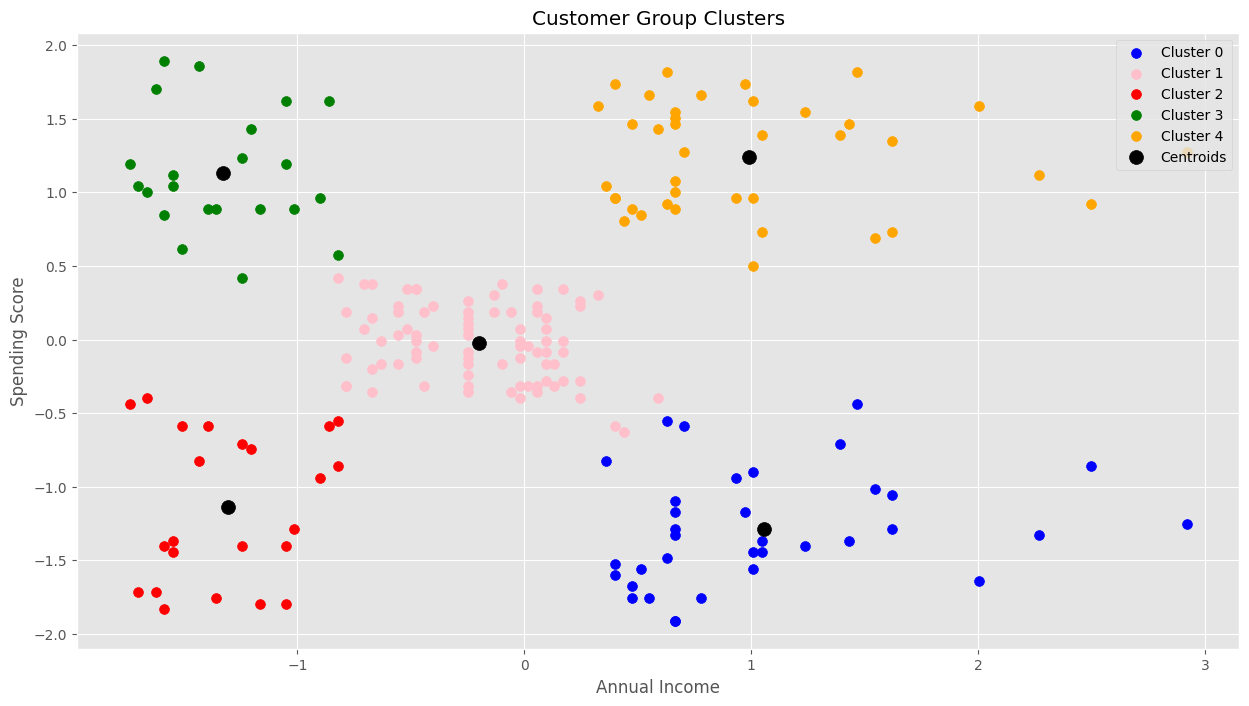

In [54]:
plt.figure(figsize=(15,8))

#The lines below will plot the data points for each cluster
#'X' is the dataset with at least two columns (features)
#'Y' is an array containing the cluster labels for each data point, produced by the clustering algorithm

plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='blue', label='Cluster 0')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='pink', label='Cluster 1')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green', label='Cluster 3')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 4')

#The line below plots the centroids of the clusters
plt.scatter(final_model.cluster_centers_[:,0], final_model.cluster_centers_[:,1], s=100, c='black', label='Centroids')

plt.legend(loc='upper right')
plt.title('Customer Group Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

These clusters tell us the following about each customer group:

**Cluster 0(Blue):** Medium to high annual income with a very low spending score
* These customers are conservative with their spending. Businesses need to explore strategies that appead to their saving mentality

**Cluster 1(Pink):** Medium low annual income with a moderate spending score
* These customers likely budget their spending carefully. Businesses could target this group with mid-range products, emphasizing affordability without compromising on quality

**Cluster 2 (Red):** Very low annual income with the lowest spending score
* These customers have limited financial resources and spend very little. They are probably most focused on only essential purchase. Businesses might need to offer discounts and budget friendly products to attract these customers

**Cluster 3 (Green):** Very low annual income with very high spending score
* This customer group can be impulsive buyers as they spend quite highly despite the low annual income. They might respond well to credit offers, loyalty rewards that help manage their spending while still accessing high value products

**Cluster 4 (Orange):** Medium high annual income with very high spending score
* This last group of customers are affluents and spend a lot as well making them highly valuable to businesses. Businesses should focus on offering luxury items, limited products and exclusive experiences to cater to these high end customers and maintain their loyalty. 